In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('expand_frame_repr', False)

def load_data(filename):
    data = pd.read_csv(filename, sep='|', skipinitialspace=True)
    for c in data.columns:
        # pandas store strings as objects somehow
        if data[c].dtype == str or data[c].dtype == object:
            data[c] = data[c].map(str.strip)
    data = data.rename(columns=lambda c: c.strip())
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    return data

In [62]:
"""
Evaluation of the performance impact of adding facts representing the existence of an attribute.
"""
transe_data = load_data('transe_litwd1k.csv')
transe_dummy_data = load_data('transe_litwd1k_dummy.csv')
transe_data['dummy'] = False
transe_dummy_data['dummy'] = True

data = pd.concat((transe_data, transe_dummy_data))
data['id']=data["Trial name"].str[-3:]

print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).groupby(by=['dummy']).head(1))

print(10*'='+" Average MRR   "+200*'=')
print(data.groupby(by=['dummy'])['mrr'].mean())
data = data.sort_values(by='mrr')

========== Best MRR   ========================================================================================================================================================================================================
               Trial name      status                   loc  learning_rate  p_norm  rank  iter  total time (s)     score       mrr  mae      loss  rel_loss  attribute_loss  dummy  mse   id
14  train_ray_4c72d_00014  TERMINATED  192.168.2.105:121954            0.1       2  1024    10         1647.37  0.458582  0.458582    0  0.363872  0.363872               0   True  0.0  014
14  train_ray_c4ed1_00014  TERMINATED   192.168.2.105:47783            0.1       2  1024    10         1367.39  0.451562  0.451562    0  0.403415  0.403415               0  False  NaN  014
========== Average MRR   =========================================================================================================================================================================================

========== Best MAE   ========================================================================================================================================================================================================
                Trial name      status                    loc  alpha attr_loss  do_sigmoid  learning_rate  p_norm  rank  iter  total time (s)     score       mrr       mae       mse      loss  rel_loss  attribute_loss
483  train_ray_2cd5b_00483  TERMINATED  192.168.2.105:2888420    0.5       mae        True           0.01       2  1024    10        3898.300  0.273680  0.332619  0.058940  0.016431  0.282256  0.505574        0.058939
23   train_ray_2cd5b_00023  TERMINATED    192.168.2.105:75464    0.9       mae       False           0.10       1   128    10         973.624  0.319478  0.399561  0.080083  0.021039  0.119721  0.476341        0.080096
========== Best MRR   =====================================================================================================

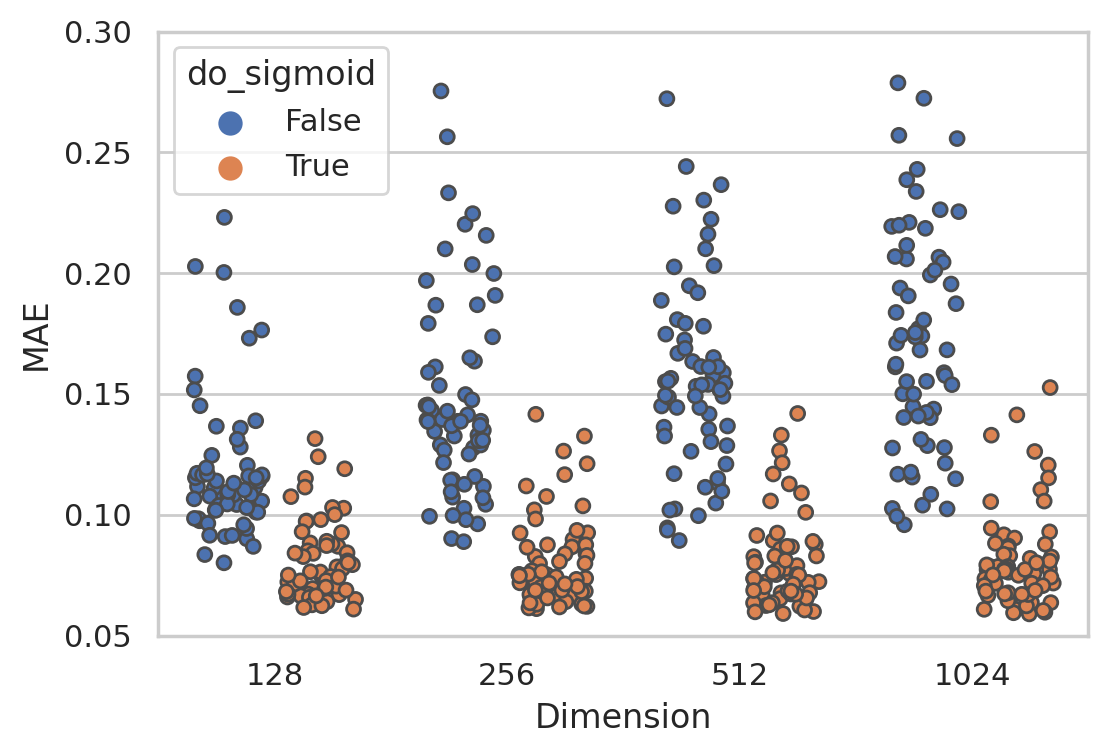

In [63]:
"""
Evaluation of the impact of applying a sigmoid function to the attribute projection operator.
"""    
data = load_data('transea_litwd1k_dummy.csv')
data['do_sigmoid'] = data['do_sigmoid'].map({'False': False, 'True':True})

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).groupby(by=['do_sigmoid']).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).groupby(by=['do_sigmoid']).head(1))

sns.set_theme(style='whitegrid')
plt.figure(dpi=200)
ax = sns.stripplot(y='mae', x='rank', hue='do_sigmoid', data=data, jitter=0.3,  dodge=True, linewidth=1)
ax.set_xlabel('Dimension')
ax.set_ylabel('MAE')
ax.set_ylim((0.05,0.3))
plt.show()

In [64]:
"""
Evaluation of the MTKGNN approach.
"""
    
data = load_data('transea_mtkgnn_litwd1k_dummy.csv')

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).head(1))

========== Best MAE   ========================================================================================================================================================================================================
               Trial name      status              loc  alpha attr_loss  learning_rate  p_norm  rank  iter  total time (s)     score      mrr       mae       mse      loss  rel_loss  attribute_loss
13  train_ray_23ffe_00013  TERMINATED  127.0.1.1:69479    0.5       mae           0.01       2  1024     1         415.374  0.275623  0.33451  0.058887  0.016023  0.298103  0.537304        0.058902
========== Best MRR   ========================================================================================================================================================================================================
              Trial name      status              loc  alpha attr_loss  learning_rate  p_norm  rank  iter  total time (s)     score       mrr       mae      m

In [65]:
"""
Evaluation of the impact of an additional transfer matrix.
"""
    
data_transr = load_data('transea_transr_litwd1k_dummy.csv')
data_transea = load_data('transea_litwd1k_dummy.csv')
data_transea['do_sigmoid'] = data_transea['do_sigmoid'].map({'False': False, 'True':True})
data = pd.concat([data_transr, data_transea[data_transea['do_sigmoid']==False]])
data['rank_attr'] = data['rank_attr'].where(pd.notna(data['rank_attr']), '-')

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).groupby(by=['rank_attr']).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).groupby(by=['rank_attr']).head(1))

sns.set_theme(style='whitegrid')
plt.figure(dpi=200)
ax = sns.stripplot(y='mae', x='rank', hue='rank_attr', data=data, jitter=0.3,  dodge=True, linewidth=1)
ax.set_xlabel('Dimension')
ax.set_ylabel('MAE')
ax.set_ylim((0.05,0.3))
ax.legend(title="Attribute Dimension", handletextpad=0, columnspacing=0, ncol=3, framealpha=0.9, scatteryoffsets=[0.5,0.5,0.5], markerscale=1.2)
plt.show()

========== Best MAE   ========================================================================================================================================================================================================
                Trial name      status                  loc  alpha attr_loss  learning_rate  p_norm  rank rank_attr  iter  total time (s)     score       mrr       mae       mse      loss  rel_loss  attribute_loss do_sigmoid
252  train_ray_1c156_00124  TERMINATED     127.0.1.1:204738    0.8       mae            0.1       2   256      20.0     1         394.988  0.311028  0.380005  0.068978  0.017265  0.144617  0.447197        0.068972        NaN
444  train_ray_1c156_00316  TERMINATED     127.0.1.1:326160    0.8       mae            0.1       2   256      50.0     1         412.269  0.280090  0.350205  0.070115  0.018672  0.167427  0.556693        0.070110        NaN
23   train_ray_2cd5b_00023  TERMINATED  192.168.2.105:75464    0.9       mae            0.1       1   

In [66]:
"""
Evaluation of using DistMult with the attribute model of TransEA.
"""
data = load_data('transea_distmult_litwd1k_dummy.csv')

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).head(1))


========== Best MAE   ========================================================================================================================================================================================================
               Trial name      status                   loc  alpha attr_loss  learning_rate  rank  iter  total time (s)    score       mrr       mae       mse      loss  rel_loss  attribute_loss
71  train_ray_8ba7c_00071  TERMINATED  192.168.2.105:234950    0.9       mae            0.1   256     1         360.377  0.33669  0.400271  0.063581  0.016036  0.117222   0.60007        0.063572
========== Best MRR   ========================================================================================================================================================================================================
               Trial name      status                   loc  alpha attr_loss  learning_rate  rank  iter  total time (s)     score      mrr       mae       mse      

In [67]:
"""
Evaluation of using ComplEx with the attribute model of TransEA.
"""
    
data = load_data('transea_complex_litwd1k_dummy.csv')

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).head(1))

========== Best MAE   ========================================================================================================================================================================================================
               Trial name      status                    loc  alpha attr_loss  learning_rate  rank  iter  total time (s)     score       mrr       mae       mse      loss  rel_loss  attribute_loss
19  train_ray_66b20_00019  TERMINATED  192.168.178.68:402721    0.5       mae           0.01  1024     1         1135.13  0.391977  0.454508  0.062531  0.016681  0.216666  0.370801        0.062532
========== Best MRR   ========================================================================================================================================================================================================
               Trial name      status                    loc  alpha attr_loss  learning_rate  rank  iter  total time (s)     score       mrr       mae       mse

In [68]:
"""
Evaluation of using TransComplEx with the attribute model of TransEA.
"""
    
data = load_data('transea_transcomplex_litwd1k_dummy.csv')

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).head(1))

========== Best MAE   ========================================================================================================================================================================================================
               Trial name      status                  loc  alpha attr_loss  learning_rate  p_norm  rank  iter  total time (s)     score       mrr       mae      mse      loss  rel_loss  attribute_loss
50  train_ray_8113f_00050  TERMINATED  192.168.2.105:42044    0.4       mae           0.01       2  1024     1         602.417  0.225741  0.286018  0.060277  0.01582  0.357339  0.555379        0.060278
========== Best MRR   ========================================================================================================================================================================================================
               Trial name      status                  loc  alpha attr_loss  learning_rate  p_norm  rank  iter  total time (s)     score       mrr    

In [69]:
"""
Evaluation of using ComplEx with the attribute model of TransEA and modulus and mean.
"""
    
data_mean = load_data('transea_complex_litwd1k_dummy.csv')
data_modulus = load_data('transea_complex_modulus_litwd1k_dummy.csv')
data_mean['model'] = 'Mean'
data_modulus['model'] = 'Modulus'
data = pd.concat([data_mean, data_modulus])

print(10*'='+" Best MAE   "+200*'=')
print(data.sort_values(by=['mae'], ascending=True).groupby(by=['model']).head(1))
print(10*'='+" Best MRR   "+200*'=')
print(data.sort_values(by=['mrr'], ascending=False).groupby(by=['model']).head(1))

print('average MRR:')
print(data.groupby('model')['mrr'].mean())
print('average MAE:')
print(data.groupby('model')['mae'].mean())

========== Best MAE   ========================================================================================================================================================================================================
               Trial name      status                    loc  alpha attr_loss  learning_rate  rank  iter  total time (s)     score       mrr       mae       mse      loss  rel_loss  attribute_loss    model
19  train_ray_66b20_00019  TERMINATED  192.168.178.68:402721    0.5       mae           0.01  1024     1        1135.130  0.391977  0.454508  0.062531  0.016681  0.216666  0.370801        0.062532     Mean
19  train_ray_5a991_00019  TERMINATED   192.168.2.105:188005    0.5       mae           0.01  1024     1         881.662  0.383794  0.451571  0.067776  0.017639  0.221666  0.375555        0.067778  Modulus
========== Best MRR   =========================================================================================================================================

In [70]:
"""
Evaluation of the performance of TransEA for different ranks.
"""
    
data = load_data('transea_litwd1k_dummy.csv')
data['do_sigmoid'] = data['do_sigmoid'].map({'False': False, 'True':True})
print(10*'='+" Best MRR   "+200*'=')
print(data[data['do_sigmoid']==False].sort_values(by=['mrr'], ascending=False).groupby(by=['rank']).head(1))
print(10*'='+" Best MAE   "+200*'=')
print(data[data['do_sigmoid']==False].sort_values(by=['mae'], ascending=True).groupby(by=['rank']).head(1))

========== Best MRR   ========================================================================================================================================================================================================
                Trial name      status                    loc  alpha attr_loss  do_sigmoid  learning_rate  p_norm  rank  iter  total time (s)     score       mrr       mae       mse      loss  rel_loss  attribute_loss
464  train_ray_2cd5b_00464  TERMINATED  192.168.2.105:2752128    0.2       mae       False            0.1       2  1024    10        3904.190  0.259542  0.453364  0.193822  0.070795  0.340552  0.377229        0.193845
336  train_ray_2cd5b_00336  TERMINATED  192.168.2.105:1984362    0.2       mae       False            0.1       2   512    10        1913.140  0.290731  0.439758  0.149027  0.044208  0.376347  0.433175        0.149033
208  train_ray_2cd5b_00208  TERMINATED  192.168.2.105:1216664    0.2       mae       False            0.1       2   256    

In [71]:
"""
Evaluation of MSE vs MAE attribute loss.
"""
    
data_mtkgnn = load_data('transea_mtkgnn_litwd1k_dummy.csv')
data_transr = load_data('transea_transr_litwd1k_dummy.csv')
data_transea = load_data('transea_litwd1k_dummy.csv')
data_transea['do_sigmoid'] = data_transea['do_sigmoid'].map({'False': False, 'True':True})
data_sigmoid = data_transea[data_transea['do_sigmoid']==True]
data_transea = data_transea[data_transea['do_sigmoid']==False]

data_mtkgnn['model'] = 'MTKGNN'
data_transr['model'] = 'TransR'
data_transea['model'] = 'TransEA'
data_sigmoid['model'] = 'Sigmoid'
data = pd.concat([data_mtkgnn, data_transr, data_transea, data_sigmoid])

data_mtkgnn['attr_loss'] = data_mtkgnn['attr_loss'].str.upper() + ' (MTKGNN)'
data_transr['attr_loss'] = data_transr['attr_loss'].str.upper() + ' (TransR)'
data_transea['attr_loss'] = data_transea['attr_loss'].str.upper() + ' (TransEA)'
data_sigmoid['attr_loss'] = data_sigmoid['attr_loss'].str.upper() + ' (Sigmoid)'
data = pd.concat([data_mtkgnn, data_transr, data_transea, data_sigmoid])
data = data.sort_values(by=['model', 'attr_loss'], key=lambda x: pd.Series(pd.Categorical(x, categories=['Sigmoid', 'MTKGNN', 'TransR', 'TransEA'], ordered=True)))


plt.figure(dpi=200)
ax = sns.stripplot(x="mae", y="attr_loss", hue="rank", data=data[data['mae']<0.2], dodge=True, alpha=.5)
ax.set_ylabel('Attribute Loss')
ax.set_xlabel('MAE')
ax.legend(title="Dimension", handletextpad=0, columnspacing=1, ncol=1)
sns.despine(ax=ax, bottom=True, left=True)
plt.show(ax)

plt.figure(dpi=200)
ax = sns.stripplot(x="mse", y="attr_loss", hue="rank", data=data[data['mse']<0.05], dodge=True, alpha=.5)
ax.set_ylabel('Attribute Loss')
ax.set_xlabel('MSE')
ax.legend(title="Dimension", handletextpad=0, columnspacing=1, ncol=1)
sns.despine(ax=ax, bottom=True, left=True)
plt.show(ax)